# Diamond Price Prediction

## Description

**Context**

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

**Content**

price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond color, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of the top of diamond relative to widest point (43--95)

## Explore the Data

### Get Data

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [20]:
data.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [21]:
data.drop(['Id'], axis=1, inplace=True)

In [22]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       10788 non-null  int64  
 1   carat    10788 non-null  float64
 2   cut      10788 non-null  object 
 3   color    10788 non-null  object 
 4   clarity  10788 non-null  object 
 5   depth    10788 non-null  float64
 6   table    10788 non-null  float64
 7   x        10788 non-null  float64
 8   y        10788 non-null  float64
 9   z        10788 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 842.9+ KB


### Categories: cut, color, clarity

In [25]:
categories_columns = ['cut', 'color', 'clarity']
for category in categories_columns:
    print(data[category].value_counts())
    print()

cut
Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: count, dtype: int64

color
G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: count, dtype: int64

clarity
SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: count, dtype: int64



### Numeric values

In [26]:
data.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Histograms

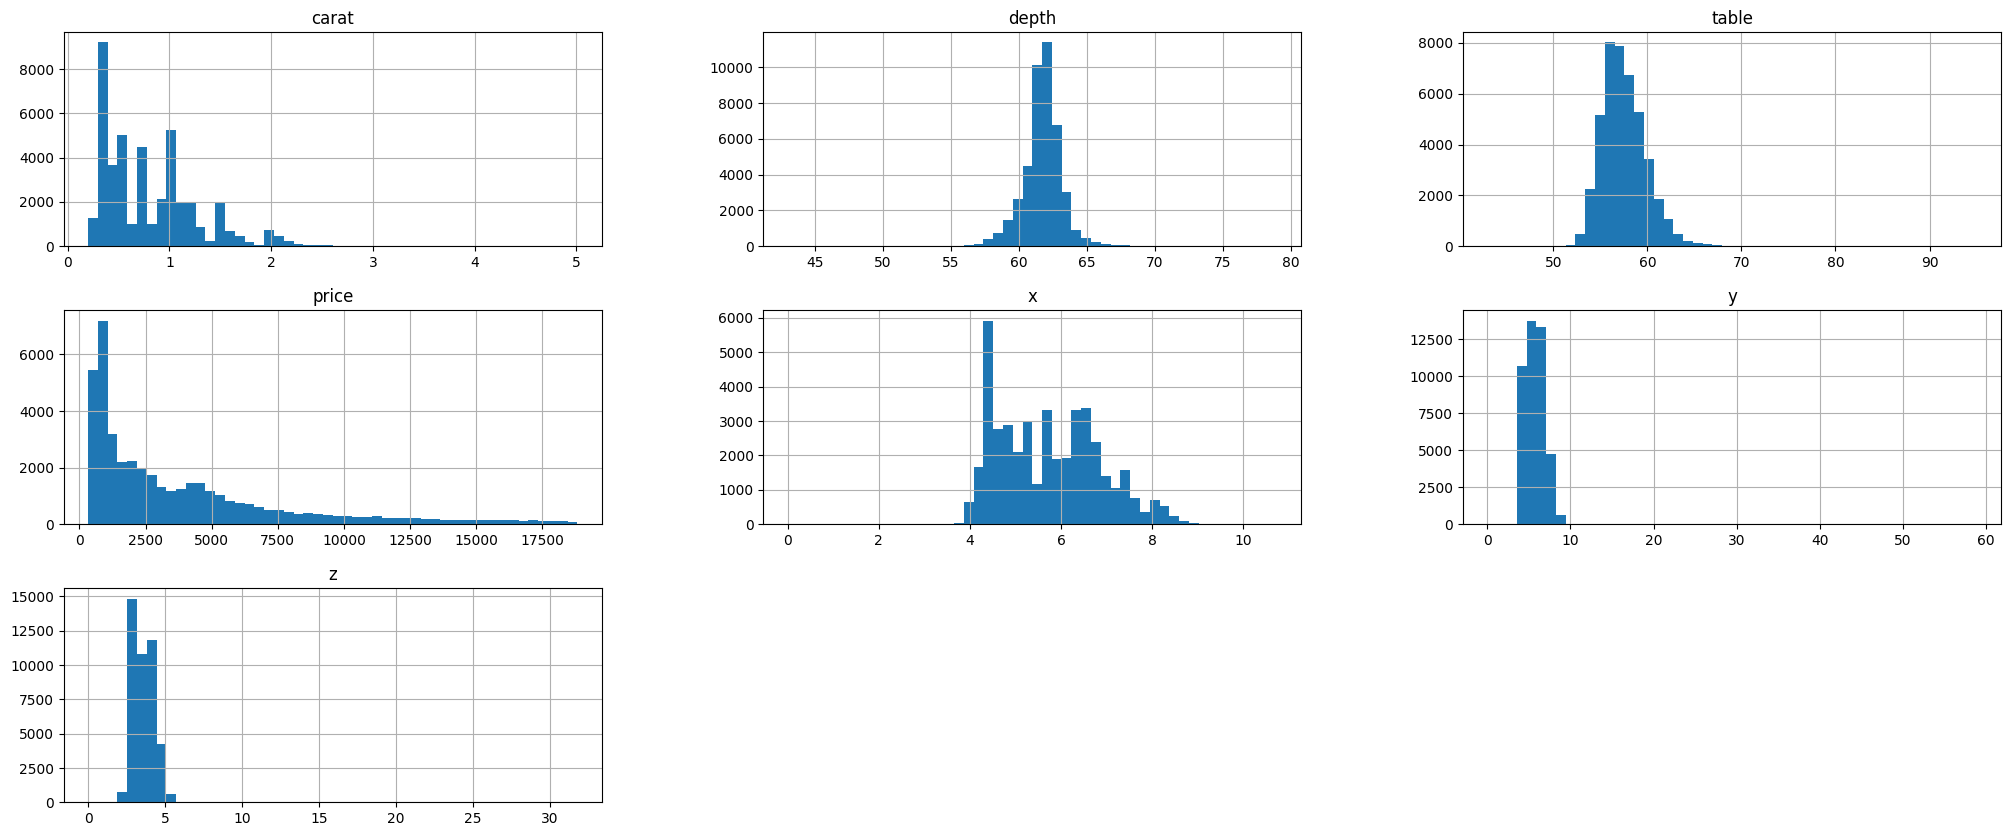

In [27]:
data.hist(bins=50, figsize=(25,10));

### Correlation

In [28]:
numeric_data = data.drop(categories_columns, axis=1)
numeric_data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.023944,0.182889,0.921911,0.975760,0.947060,0.948923
depth,0.023944,1.000000,-0.302794,-0.013137,-0.029601,-0.033354,0.090834
table,0.182889,-0.302794,1.000000,0.128501,0.197342,0.184310,0.150746
price,0.921911,-0.013137,0.128501,1.000000,0.885181,0.861354,0.857665
x,0.975760,-0.029601,0.197342,0.885181,1.000000,0.968954,0.965677
y,0.947060,-0.033354,0.184310,0.861354,0.968954,1.000000,0.942670
z,0.948923,0.090834,0.150746,0.857665,0.965677,0.942670,1.000000


### Split the Data

In [62]:
X = data.drop('price', axis=1)
y = data['price']

## Prepare the Data for ML Algorithms

### Column Droper

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin

In [31]:
class ColumnDroper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
       return X.drop(['x', 'y', 'z'], axis=1)

### Ordinal Encoder

In [32]:
class MyOrdinalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.cut_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
        self.color_mapping = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
        self.clarity_mapping = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

    def fit(self, X, y=None):
        return self
    
    def transform(self, data):
        data['cut_encoded'] = data['cut'].map(self.cut_mapping)
        data['color_encoded'] = data['color'].map(self.color_mapping)
        data['clarity_encoded'] = data['clarity'].map(self.clarity_mapping)

        return data.drop(categories_columns, axis=1)


### Pipeline

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipline = Pipeline([
    ('column_droper', ColumnDroper()),
    ('std_scalar', StandardScaler())
])

full_pipline = ColumnTransformer([
    ('num', num_pipline, list(numeric_data.drop('price', axis=1))),
    ('cat', MyOrdinalEncoder(), categories_columns)
])

In [63]:
X_prepared = full_pipline.fit_transform(X)

## Select and Train a Model

### Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_prepared, y)

LinearRegression()

In [65]:
from sklearn.model_selection import cross_val_score

linear_model_scores = cross_val_score(
    linear_model, X_prepared, y,
    scoring='neg_mean_squared_error', cv=10
)

In [66]:
linear_model_rmse = np.sqrt(-linear_model_scores)

In [67]:
def print_socres(rmse):
    print(f'Scores:\n {rmse}')
    print(f'Mean: {np.mean(rmse)}')
    print(f'Standard Deviation: {np.std(rmse)}')

print_socres(linear_model_rmse)

Scores:
 [1212.13702557 1211.80862776 1262.21707787 1189.02727346 1267.20566733
 1221.89821977 1277.18097476 1206.12885207 1206.5342184  1232.24541754]
Mean: 1228.6383354524496
Standard Deviation: 28.547568049522987


1200 error is large considering that most prices goes between $900 - $5,300 with std: 3,900

### Decision Tree

In [68]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X_prepared, y)

DecisionTreeRegressor()

In [69]:
tree_model_scores = cross_val_score(
    tree_model, X_prepared, y,
    scoring='neg_mean_squared_error', cv=10
)

In [70]:
tree_model_rmse = np.sqrt(-tree_model_scores)
print_socres(tree_model_rmse)

Scores:
 [738.24115911 707.22281566 710.90031259 694.93271635 735.88680505
 711.56730771 717.63361682 693.19276468 683.75245433 741.16714411]
Mean: 713.4497096399284
Standard Deviation: 18.941402731026


### Random Forest

In [71]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()
forest_model.fit(X_prepared, y)

RandomForestRegressor()

In [72]:
forest_model_scores = cross_val_score(
    forest_model, X_prepared, y,
    scoring='neg_mean_squared_error', cv=10
)

In [73]:
forest_model_rmse = np.sqrt(-forest_model_scores)
print_socres(forest_model_rmse)

Scores:
 [559.2411847  537.85067612 566.36887804 546.36493628 557.56791187
 563.65157632 559.73283984 533.98190686 535.4905806  568.57008153]
Mean: 552.8820572154527
Standard Deviation: 12.575429888111675


### Save Models

In [74]:
# CODE HERE
import joblib

joblib.dump(linear_model, 'linear_model.pkl')
joblib.dump(tree_model, 'desicion_tree_model.pkl')
joblib.dump(forest_model, 'random_forest_model.pkl')

# For later: load the model
#model = joblib.load("models\model.pkl")

['random_forest_model.pkl']

## Fine-Tune

In [ ]:
# Grid Search